In [428]:
import pandas as pd
import numpy as np

In [429]:
TEAMS = {"MIBR": 0, 
         "Leviatán": 1, 
         "Sentinels": 2, 
         "NRG Esports": 3, 
         "FURIA": 4, 
         "100 Thieves": 5, 
         "LOUD" : 6, 
         "Evil Geniuses" : 7, 
         "G2 Esports" : 8, 
         "Cloud9" : 9, 
         "KRÜ Esports" : 10, 
         "Titan Esports Club" : 11, 
         "JDG Esports" : 12, 
         "All Gamers" : 13, 
         "TYLOO" : 14, 
         "Bilibili Gaming" : 15, 
         "Wolves Esports" : 16, 
         "Dragon Ranger Gaming" : 17, 
         "Nova Esports" : 18, 
         "FunPlus Phoenix" : 19, 
         "Trace Esports" : 20, 
         "EDward Gaming" : 21, 
         "ZETA DIVISION" : 22, 
         "DRX" : 23, 
         "Team Secret" : 24, 
         "BLEED" : 25, 
         "T1" : 26, 
         "Gen.G" : 27, 
         "Paper Rex" : 28, 
         "Talon Esports" : 29, 
         "Rex Regum Qeon" : 30, 
         "DetonatioN FocusMe" : 31, 
         "Global Esports" : 32, 
         "FUT Esports" : 33, 
         "KOI" : 34, 
         "BBL Esports" : 35, 
         "FNATIC" : 36, 
         "Team Heretics" : 37, 
         "Natus Vincere" : 38, 
         "GIANTX" : 39, 
         "Gentle Mates" : 40, 
         "Team Vitality" : 41, 
         "Team Liquid" : 42, 
         "Karmine Corp": 43}

MAPS = {"Bind" : 0, 
        "Haven" : 1, 
        "Split" : 2, 
        "Ascent" : 3,
        "Icebox" : 4, 
        "Breeze" : 5, 
        "Fracture" : 6, 
        "Abyss" : 7, 
        "Lotus" : 8, 
        "Sunset" : 9, 
        "Pearl" : 10}



In [430]:
data = pd.read_csv("Dataset/maps_scores.csv")
data = data[["Map", "Team A", "Team B", "Team A Score", "Team B Score"]]
data["Team A Delta"] = data["Team A Score"] - data["Team B Score"]
data["Team B Delta"] = data["Team B Score"] - data["Team A Score"]
data.loc[data["Team A Delta"] < 0, "Team A Win Chance"] = 0
data.loc[data["Team A Delta"] > 0, "Team A Win Chance"] = 100
data

,Map,Team A,Team B,Team A Score,Team B Score,Team A Delta,Team B Delta,Team A Win Chance
0,Ascent,MIBR,Leviatán,9,13,-4,4,0.0
1,Icebox,MIBR,Leviatán,7,13,-6,6,0.0
2,Lotus,Sentinels,NRG Esports,13,8,5,-5,100.0
3,Sunset,Sentinels,NRG Esports,14,12,2,-2,100.0
4,Icebox,FURIA,100 Thieves,14,12,2,-2,100.0
...,...,...,...,...,...,...,...,...
1013,Lotus,DRX,Gen.G,8,13,-5,5,0.0
1014,Ascent,Paper Rex,Gen.G,5,13,-8,8,0.0
1015,Split,Paper Rex,Gen.G,13,4,9,-9,100.0
1016,Lotus,Paper Rex,Gen.G,11,13,-2,2,0.0


In [431]:
ACS = pd.read_csv("Dataset/overview.csv")
ACS = ACS[["Match Type", "Map", "Match Name", "Team", "Average Combat Score"]]
ACS.groupby("Team")['Average Combat Score']

In [432]:
TeamAcs = ACS.groupby(["Team", "Map"])['Average Combat Score'].mean().reset_index()
TeamAcs

,Team,Map,Average Combat Score
0,100 Thieves,Abyss,200.400000
1,100 Thieves,Ascent,219.828571
2,100 Thieves,Bind,207.342857
3,100 Thieves,Breeze,226.666667
4,100 Thieves,Haven,197.266667
...,...,...,...
346,ZETA DIVISION,Haven,209.400000
347,ZETA DIVISION,Icebox,183.900000
348,ZETA DIVISION,Lotus,192.914286
349,ZETA DIVISION,Split,171.800000


In [433]:
merged_data = data.merge(TeamAcs, left_on=["Team A", "Map"], right_on=["Team", "Map"], how="left")
merged_data = merged_data.merge(TeamAcs, left_on=["Team B", "Map"], right_on=["Team", "Map"], how="left")
merged_data = merged_data.rename(columns={"Average Combat Score_x" : "Team A ACS", "Average Combat Score_y" : "Team B ACS"})
merged_data.drop(columns=["Team_x", "Team_y"], inplace=True)
merged_data = merged_data.replace({"Team A" : TEAMS, "Team B" : TEAMS, "Map" : MAPS})
merged_data

C:\Users\mjas0\AppData\Local\Temp\ipykernel_15200\2015098582.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data = merged_data.replace({"Team A" : TEAMS, "Team B" : TEAMS, "Map" : MAPS})


,Map,Team A,Team B,Team A Score,Team B Score,Team A Delta,Team B Delta,Team A Win Chance,Team A ACS,Team B ACS
0,3,0,1,9,13,-4,4,0.0,190.500000,214.085714
1,4,0,1,7,13,-6,6,0.0,181.300000,215.240000
2,8,2,3,13,8,5,-5,100.0,211.446154,185.400000
3,9,2,3,14,12,2,-2,100.0,214.225000,196.675000
4,4,4,5,14,12,2,-2,100.0,186.714286,206.880000
...,...,...,...,...,...,...,...,...,...,...
1013,8,23,27,8,13,-5,5,0.0,198.942857,209.428571
1014,3,28,27,5,13,-8,8,0.0,194.583333,206.682353
1015,2,28,27,13,4,9,-9,100.0,213.377778,194.928571
1016,8,28,27,11,13,-2,2,0.0,206.712500,209.428571


In [434]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier



In [435]:
merged_data = merged_data.drop(["Team A Score", "Team B Score", "Team A Delta", "Team B Delta"], axis=1)
X = merged_data.drop(["Team A Win Chance"], axis = 1)
X

,Map,Team A,Team B,Team A ACS,Team B ACS
0,3,0,1,190.500000,214.085714
1,4,0,1,181.300000,215.240000
2,8,2,3,211.446154,185.400000
3,9,2,3,214.225000,196.675000
4,4,4,5,186.714286,206.880000
...,...,...,...,...,...
1013,8,23,27,198.942857,209.428571
1014,3,28,27,194.583333,206.682353
1015,2,28,27,213.377778,194.928571
1016,8,28,27,206.712500,209.428571


In [436]:
Y = merged_data["Team A Win Chance"]
Y = Y.replace({100.0: 1, 0.0: 0})
Y = Y.astype(int)

Y

0       0
1       0
2       1
3       1
4       1
       ..
1013    0
1014    0
1015    1
1016    0
1017    0
Name: Team A Win Chance, Length: 1018, dtype: int32

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# rf = RandomForestClassifier(n_estimators=100, random_state=42, verbose=True)
# rf.fit(X_train, y_train)
log_regr = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, multi_class='auto')
# log_regr.fit(X_train, y_train)
bag_clf = BaggingClassifier(estimator=log_regr, n_estimators=20, bootstrap=True, warm_start=True)


In [438]:
#Bagging pred
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {np.around(accuracy*100, 2)}%")

Accuracy: 67.65%


c:\Users\mjas0\.conda\envs\valostats\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mjas0\.conda\envs\valostats\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mjas0\.conda\envs\valostats\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mjas0\.conda\envs\valostats\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: Futur

In [439]:
# #y_pred = rf.predict(X_test)
# y_pred = log_regr.predict(X_test)
# print(y_pred)
# accuracy = accuracy_score(y_test, y_pred)
# # conf1_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# # fig, ax = plt.subplots()

# # cm_display = ConfusionMatrixDisplay(confusion_matrix=conf1_matrix, display_labels=rf.classes_)
# # cm_display.plot(ax=ax, cmap='Greens')

# print(f"Accuracy: {np.around(accuracy*100, 2)}%")
# # print("Classification Report:")
# # print(report)

In [451]:
random_row = X_train.sample(n=1)
# custom_data = np.array([[8, 10, 5, 13, 11, 2]])
custom_data_df = pd.DataFrame([[3,2,21,206,205]], columns=X_train.columns)
probability_y1 = bag_clf.predict_proba(custom_data_df)[:, 1]
rand_pred = bag_clf.predict(custom_data_df)
if rand_pred == 0:
    print(f"Team A will lose with a probability of: {np.around(probability_y1*100, 2)}%")
else:
    print(f"Team A will win with a probability of:{np.around(probability_y1*100, 2)}%")


Team A will lose with a probability of: [42.91]%


                        Map    Team A    Team B  Team A Win Chance
Map                1.000000  0.067232  0.075541           0.069710
Team A             0.067232  1.000000  0.789539           0.021418
Team B             0.075541  0.789539  1.000000           0.007623
Team A Win Chance  0.069710  0.021418  0.007623           1.000000


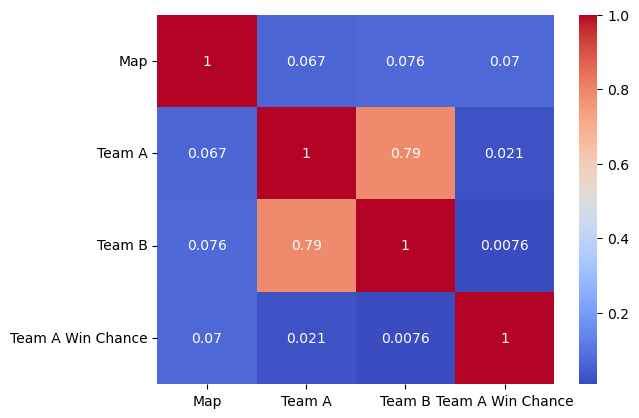

In [ ]:
correlation_matrix = merged_data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()